In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Image

In [33]:
data = pd.read_csv('/Users/Lenovo/Desktop/clean_data.csv')

In [34]:
# Check the data types of the columns. 

In [35]:
data.dtypes

Unnamed: 0                      int64
Customer                       object
State                          object
CustomerLifetimeValue         float64
Response                       object
Coverage                       object
Education                      object
EffectiveToDate                object
EmploymentStatus               object
Gender                         object
Income                          int64
LocationCode                   object
MaritalStatus                  object
MonthlyPremiumAuto              int64
MonthsSinceLastClaim            int64
MonthsSincePolicyInception      int64
NumberofOpenComplaints          int64
NumberofPolicies                int64
PolicyType                     object
Policy                         object
RenewOfferType                 object
SalesChannel                   object
TotalClaimAmount              float64
VehicleClass                   object
VehicleSize                    object
months                          int64
dtype: objec

In [36]:
# Get the numeric data into dataframe called numerical 


In [37]:
numerical = data._get_numeric_data()
numerical

,Unnamed: 0,CustomerLifetimeValue,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,TotalClaimAmount,months
0,0,2763.519279,56274,69,32,5,0,1,384.811147,2
1,1,6979.535903,0,94,13,42,0,8,1131.464935,1
2,2,12887.431650,48767,108,18,38,0,2,566.472247,2
3,3,7645.861827,0,106,18,65,0,7,529.881344,1
4,4,2813.692575,43836,73,12,44,0,1,138.130879,2
...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,73,18,89,0,2,198.234764,2
9130,9130,3096.511217,21604,79,14,28,0,1,379.200000,2
9131,9131,8163.890428,0,85,9,37,3,2,790.784983,2
9132,9132,7524.442436,21941,96,34,3,0,3,691.200000,2


In [38]:
# categorical columns in a dataframe called categoricals.

In [39]:
categorical = data.drop(columns = numerical.columns)
categorical.head()

,Customer,State,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,LocationCode,MaritalStatus,PolicyType,Policy,RenewOfferType,SalesChannel,VehicleClass,VehicleSize
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [40]:
categorical = data.drop(numerical,  axis=1)
categorical.head ()

,Customer,State,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,LocationCode,MaritalStatus,PolicyType,Policy,RenewOfferType,SalesChannel,VehicleClass,VehicleSize
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [41]:
# Now we will try to check the normality of the numerical variables visually:



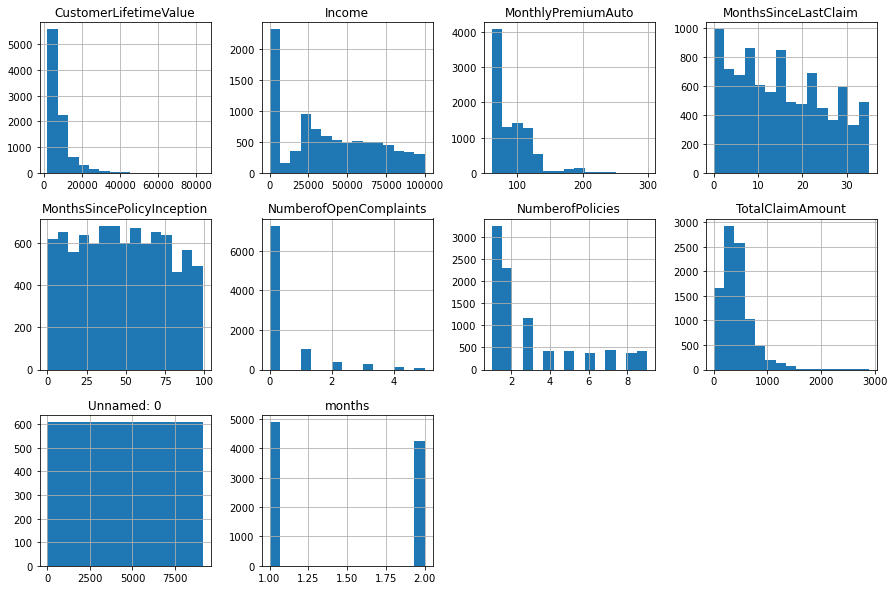

In [42]:
# Use Matplotlib to construct histograms

numerical.hist(bins=15, figsize=(15, 10), layout=(3, 4));

In [43]:
# Use seaborn library to construct distribution plots for the numerical variables

In [44]:
sns.displot(numerical, x="NumberofPolicies", bins=20)
plt.show()


AttributeError: module 'seaborn' has no attribute 'displot'

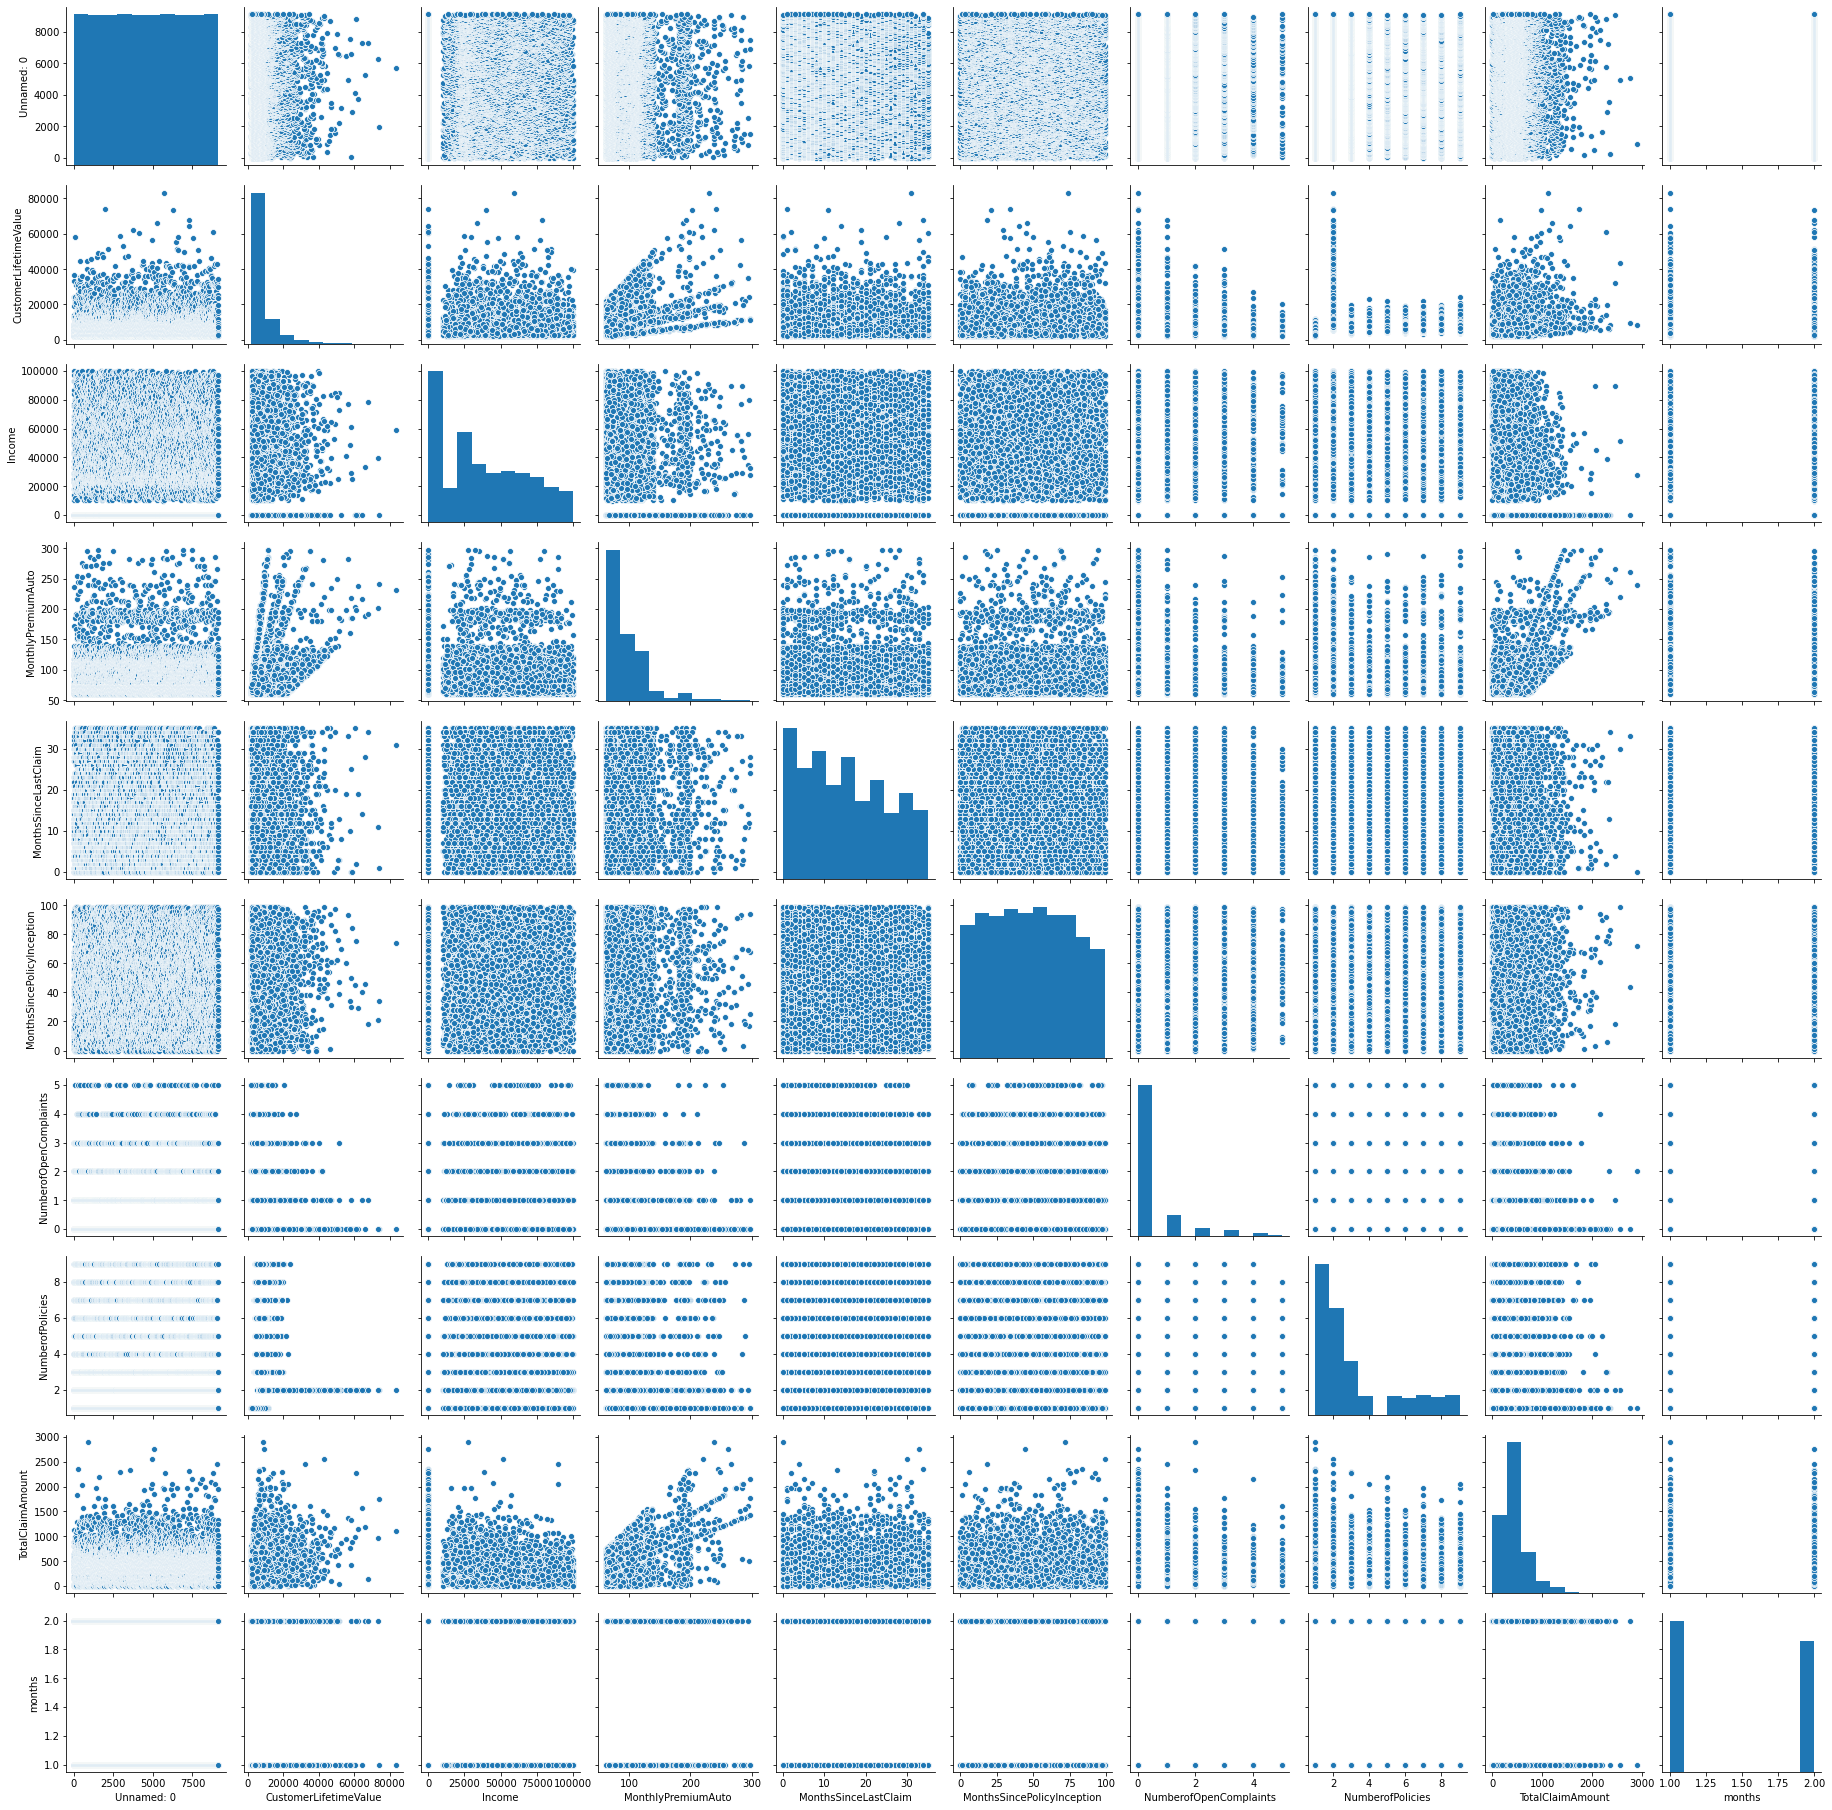

In [45]:
sns.pairplot(numerical)

In [ ]:
sns.histplot(x='NumberofPolicies', data=data)
plt.show()


In [ ]:
for i,x in enumerate(numerical.columns):
    sns.distplot(numerical[x], ax=axes[int(i/2),i%2])


In [ ]:
# Do the distributions for different numerical variables look like a normal distribution?


In [ ]:
#For the numerical variables, check the multicollinearity between the features.
#Please note that we will use the column total_claim_amount later as the target variable.


In [ ]:
corr_data = numerical.corr()
correlations_matrix = corr_data.corr()
correlations_matrix

In [ ]:
#create a heatmap to visually interrogate the relationships 
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
#use the mask technique to make that a bit easier to read 
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [ ]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). 
#Write code for both the correlation matrix and for seaborn heatmap. 
#If there is no pair of features that have a high correlation, then do not drop any features

In [ ]:
#There is no any correlation greater than 0.9 in this data, so no need to drop any.

The closest one would be 'MonthlyPremiumAuto' und I beleive this would be the formula: corr_data.drop(['MonthlyPremiunAuto'], axis=0)